# 数据探索和数据预处理
---
预处理的想法：

1. 获取每张图像中的`left`, `top`, `width`, `height`的数据，按照`32x32`的尺寸截取图片
2. 截取图片之后，把数据分成训练，测试和验证数据，使用序列化保存起来

### 转换图片尺寸

In [93]:
%matplotlib inline
import os
import pickle
import random

import h5py
import numpy as np
import PIL.Image as Image
import IPython.display as display
import matplotlib.pyplot as plt

In [36]:
#定义图片截取函数，灰度转化函数和归一化函数

def crop_image(img_path, img_boxes):
    """
    对每张图片按照32x32的尺寸以及img_boxes的范围进行截取
    """
    img = Image.open(img_path)
    left, top, width, height = \
        img_boxes['left'], img_boxes['top'], img_boxes['width'], img_boxes['height']
    
    # 获取截取后的图片的高度和宽度
    min_top, max_top = np.amin(top), np.amax(top)
    im_height = max_top + height[np.argmax(top)] - min_top
    min_left, max_left = np.amin(left), np.amax(left)
    im_width = max_left + width[np.argmax(left)] - min_left
    
    # 扩大图片，确定top, left, bottom, right
    im_top = np.floor(min_top - 0.1 * im_height)        
    im_left = np.floor(min_left - 0.1 * im_width)
    im_bottom = np.amin([np.ceil(im_top + 1.2 * im_height), img.size[1]])
    im_right = np.amin([np.ceil(im_left + 1.2 * im_width), img.size[0]])
    # 剪切图片
    return img.crop(box=(im_left, im_top, im_right, im_bottom)).resize((32, 32))


def to_gray_scale(img):
    """
    把图片转为灰度值
    """
    return np.dot(np.array(img, dtype=np.float32), [[0.2989],[0.5870],[0.1140]])


def z_score_normalize(img):
    """
    对灰度图片进行归一化
    """
    mean = np.mean(img, dtype=np.float32)
    std = np.std(img, dtype=np.float32)
    if std < 1e-4: 
        std = 1.
    return (img - mean) / std


size = (437, 202)


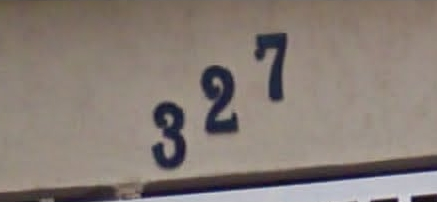

In [37]:
# 测试上面的代码

train_data = h5py.File('./train/digitStruct.mat')


def get_name(index, hdf5_data):
    name = hdf5_data['/digitStruct/name']
    file_name = ''.join([chr(v[0]) for v in hdf5_data[name[index][0]].value])
    return file_name

def get_box_data(index, hdf5_data):
    """
    获取left, top, width, height
    """
    metadata= {}
    metadata['height'] = []
    metadata['label'] = []
    metadata['left'] = []
    metadata['top'] = []
    metadata['width'] = []
    
    def print_attrs(name, obj):
        vals = []
        if obj.shape[0] == 1:
            vals.append(obj[0][0])
        else:
            for k in range(obj.shape[0]):
                vals.append(hdf5_data[obj[k][0]][0][0])
        metadata[name] = vals
    
    box = hdf5_data['/digitStruct/bbox'][index]
    hdf5_data[box[0]].visititems(print_attrs)
    return metadata

_46_pic = get_name(45, train_data)
img = Image.open(os.path.join('train', _46_pic))
print 'size =', img.size
display.display(img)

size = (32, 32)


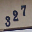

In [38]:
# 缩放图片
_46_box = get_box_data(45, train_data)
croped = crop_image(os.path.join('train', _46_pic), _46_box)
print 'size =', croped.size
display.display(croped)

size = (32, 32, 1)


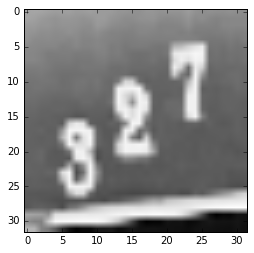

In [39]:
# 灰度化
gray = to_gray_scale(croped)
print 'size =', gray.shape
plt.imshow(gray.reshape(32, 32), cmap=plt.cm.Greys)

size = (32, 32, 1)


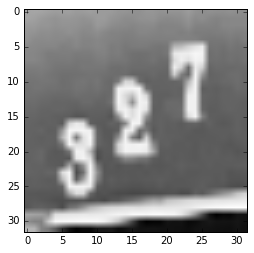

In [40]:
# 归一化之后的图像
normolized_img = z_score_normalize(gray)
print 'size =', normolized_img.shape
plt.imshow(normolized_img.reshape(32, 32), cmap=plt.cm.Greys)

In [42]:
# picture 22
_22_pic = get_name(21, train_data)
img = Image.open(os.path.join('train', _22_pic))
print 'size =', img.size
display.display(img)

size = (81, 28)


size = (32, 32)


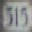

In [43]:
_22_box = get_box_data(21, train_data)
croped = crop_image(os.path.join('train', _22_pic), _22_box)
print 'size =', croped.size
display.display(croped)

size = (32, 32, 1)


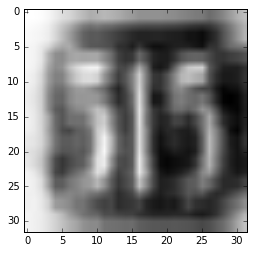

In [44]:
# 灰度化
gray = to_gray_scale(croped)
print 'size =', gray.shape
plt.imshow(gray.reshape(32, 32), cmap=plt.cm.Greys)

size = (32, 32, 1)


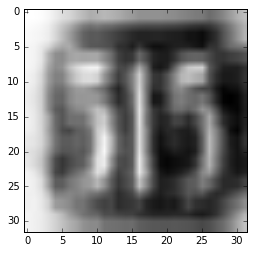

In [45]:
# 归一化之后的图像
normolized_img = z_score_normalize(gray)
print 'size =', normolized_img.shape
plt.imshow(normolized_img.reshape(32, 32), cmap=plt.cm.Greys)

size = (108, 40)


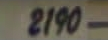

In [47]:
# picture 22
pic = get_name(263, train_data)
img = Image.open(os.path.join('train', pic))
print 'size =', img.size
display.display(img)

size = (32, 32)


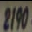

In [48]:
box = get_box_data(263, train_data)
croped = crop_image(os.path.join('train', pic), box)
print 'size =', croped.size
display.display(croped)

size = (32, 32, 1)


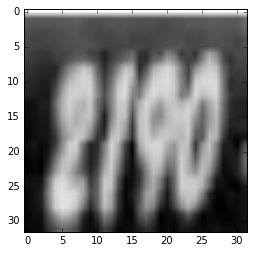

In [49]:
# 灰度化
gray = to_gray_scale(croped)
print 'size =', gray.shape
plt.imshow(gray.reshape(32, 32), cmap=plt.cm.Greys)

size = (32, 32, 1)


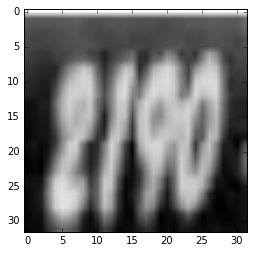

In [50]:
# 归一化之后的图像
normolized_img = z_score_normalize(gray)
print 'size =', normolized_img.shape
plt.imshow(normolized_img.reshape(32, 32), cmap=plt.cm.Greys)

In [51]:
box

{'height': [28.0, 28.0, 28.0, 28.0],
 'label': [2.0, 1.0, 9.0, 10.0],
 'left': [27.0, 44.0, 57.0, 67.0],
 'top': [5.0, 6.0, 3.0, 5.0],
 'width': [16.0, 11.0, 12.0, 16.0]}

In [78]:
def fetch_all_data(folder):
    """
    对train, test, extra的数据进行提取, 以numpy的array的形式存储
    :param folder:
    :return:
    """
    mat_data = h5py.File(os.path.join(folder, 'digitStruct.mat'))
    size = mat_data['/digitStruct/name'].size
    dataset = np.ndarray([size, 32, 32, 1], dtype=np.float32)
    labels = np.ones([size, 6], dtype=np.int) * 10

    for i in range(size):
        _pic = get_name(i, mat_data)
        # 缩放图片
        _box = get_box_data(i, mat_data)
        croped = crop_image(os.path.join(folder, _pic), _box)
        # 灰度化
        gray = to_gray_scale(croped)
        # 归一化之后的图像
        norm_img = z_score_normalize(gray)
        num_digits = len(_box['label'])
        if num_digits > 5:
            print('#', i, 'image has more than 5 digits, skip...')
        else:
            labels[i, 0] = num_digits
            for j in range(num_digits):
                labels[i, j+1] = _box['label'][j] if _box['label'][j] != 10 else 0
            dataset[i, ...] = norm_img[...]
    return dataset, labels

In [70]:
train_data, train_labels = fetch_all_data(folder='train')

('#', 29929, 'image has more than 5 digits, skip...')


In [79]:
test_data, test_labels = fetch_all_data(folder='test')

In [80]:
extra_data, extra_labels = fetch_all_data(folder='extra')

In [81]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)
print(extra_data.shape, extra_labels.shape)

((33402, 32, 32, 1), (33402, 6))
((13068, 32, 32, 1), (13068, 6))
((202353, 32, 32, 1), (202353, 6))


In [82]:
# 删除第29929张图片的数据
train_data = np.delete(train_data, 29929, axis=0)
train_labels = np.delete(train_labels, 29929, axis=0)

In [83]:
print(train_data.shape, train_labels.shape)

((33401, 32, 32, 1), (33401, 6))


In [91]:
np.where(train_labels[:, 1] == 1)

(array([    0,     8,     9, ..., 33389, 33395, 33400]),)

In [95]:
# 混洗数据，让类分布更加均匀

random.seed()

n_labels = 10
valid_index, valid_index2 = list(), list()
train_index, train_index2 = list(), list()
for i in np.arange(n_labels):
    # 得到训练和验证数据，按照图片中的第一个数字分别得到400个
    # 目的是为了让数字显得更均匀，让类分布更加均匀
    valid_index.extend(np.where(train_labels[:,1] == i)[0][:400].tolist())
    train_index.extend(np.where(train_labels[:,1] == i)[0][400:].tolist())
    valid_index2.extend(np.where(extra_labels[:,1] == i)[0][:200].tolist())
    train_index2.extend(np.where(extra_labels[:,1] == i)[0][200:].tolist())

# 混洗数据
random.shuffle(valid_index)
random.shuffle(train_index)
random.shuffle(valid_index2)
random.shuffle(train_index2)

# 拼接训练数据和验证数据
valid_dataset = np.concatenate((extra_data[valid_index2, ...], train_data[valid_index, ...]), axis=0)
valid_labels = np.concatenate((extra_labels[valid_index2,:], train_labels[valid_index,:]), axis=0)
train_dataset = np.concatenate((extra_data[train_index2, ...], train_data[train_index, ...]), axis=0)
train_labels_ = np.concatenate((extra_labels[train_index2,:], train_labels[train_index,:]), axis=0)

print(train_dataset.shape, train_labels_.shape)
print(test_data.shape, test_labels.shape)
print(valid_dataset.shape, valid_labels.shape)

((230070, 32, 32, 1), (230070, 6))
((13068, 32, 32, 1), (13068, 6))
((5684, 32, 32, 1), (5684, 6))


In [97]:
picked_data = 'SVHN.pickle'

with open(picked_data, 'wb') as f:
    save = {
        'train_data': train_dataset,
        'train_labels': train_labels_,
        'test_data': test_data,
        'test_labels': test_labels,
        'valid_data': valid_dataset,
        'valid_labels': valid_labels
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    statinfo = os.stat(picked_data)
    print('Compressed pickle size:', statinfo.st_size)
    

('Compressed pickle size:', 1031118848)
